In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [5]:
def image_output(image_array):
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')
    plt.show()

In [6]:
def convert_to_grayscale(image_path):
    image = imread(image_path)
    if len(image.shape) == 3 and image.shape[2] >= 3:
        grayscale_image = (0.2989 * image[:, :, 0] + 
                           0.5870 * image[:, :, 1] + 
                           0.1140 * image[:, :, 2])
    else:
        grayscale_image = image
    return grayscale_image

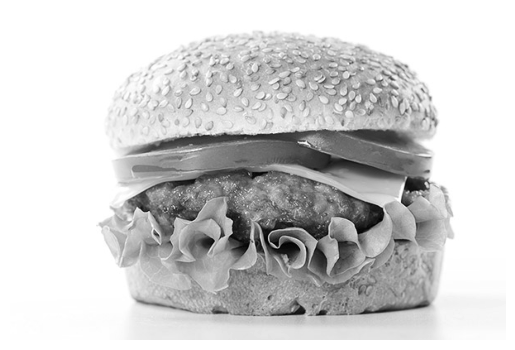

In [38]:
img_array = convert_to_grayscale('photos/burger.jpg')
image_output(img_array)

In [12]:
def filter_image(image, kernel, k):
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
    
    output_h = image_h - kernel_h + 1
    output_w = image_w - kernel_w + 1

    output = np.zeros((output_h, output_w))

    for i in range(output_h):
        for j in range(output_w):
            region = image[i:i + kernel_h, j:j + kernel_w]
            output[i, j] = np.sum(region * kernel * k)
    
    image_output(output)

# 1) Зсув

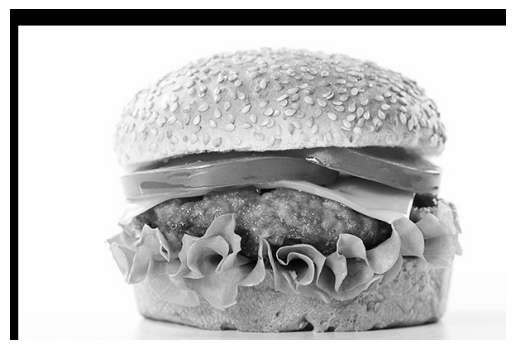

In [39]:
def shift_image(image):
    height, width = image.shape
    
    shifted_array = np.zeros((height, width, 3), dtype=np.uint8)
    
    for y in range(height):
        for x in range(width):
            x1 = x + 10
            y1 = y + 20
            

            if 0 <= x1 < width and 0 <= y1 < height:
                shifted_array[y1, x1] = image[y, x]
    
    image_output(shifted_array)

shift_image(img_array)

# 2) Інверсія

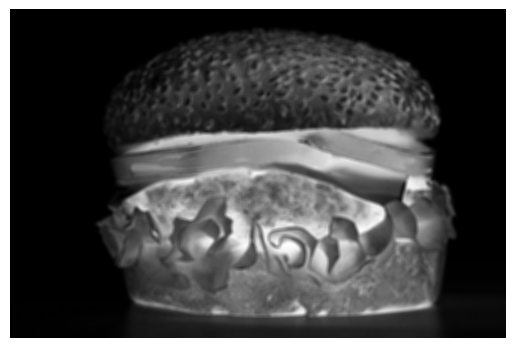

In [40]:
filter = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, -1, -1, -1, -1, -1, 0],
    [0, -1, -1, -1, -1, -1, 0],
    [0, -1, -1, -1, -1, -1, 0],
    [0, -1, -1, -1, -1, -1, 0],
    [0, -1, -1, -1, -1, -1, 0],
    [0, 0, 0, 0, 0, 0, 0]
])
filter_image(img_array, filter, 1)

# 3) Згладжування по Гауссу

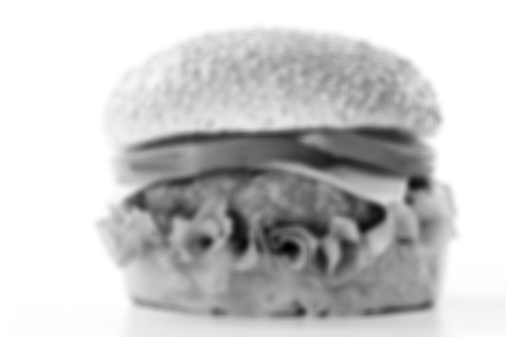

In [41]:
sharpen_filter = np.array([
    [1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1],
    [1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1],
    [1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1],
    [1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1],
    [2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2],
    [2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2],
    [2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2],
    [2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2],
    [1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1],
    [1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1],
    [1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1],
    [1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1]
])

filter_image(img_array, sharpen_filter, 1/16)


# 4) Розмиття "рух по дiагоналi"

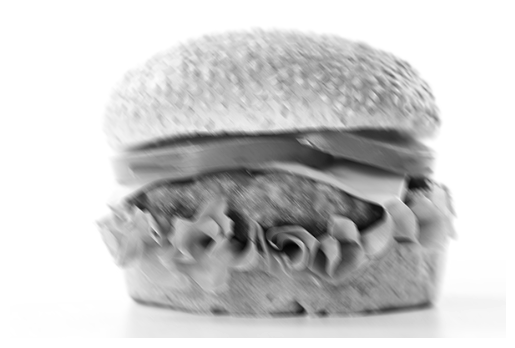

In [42]:
sharpen_filter = np.array([
    [1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1]
])

filter_image(img_array, sharpen_filter, 1/7)


# 5) Пiдвищення рiзкостi

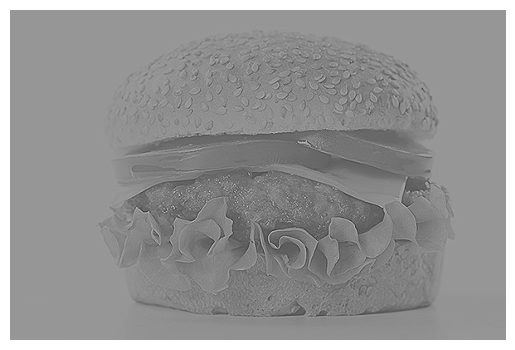

In [43]:
sharpen_filter = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

filter_image(img_array, sharpen_filter, 1)


# 6) Фiльтр Собеля

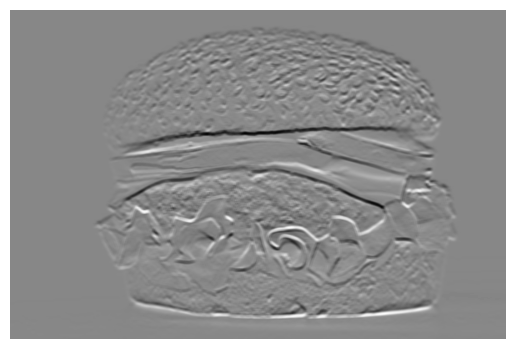

In [44]:
sharpen_filter = np.array([
    [ -1, -1, -2, -2, -1, -1],
    [ -1, -1, -2, -2, -1, -1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 1, 2, 2, 1, 1],
    [1, 1, 2, 2, 1, 1]
])

filter_image(img_array, sharpen_filter, 1)

# 7) Фiльтр границi

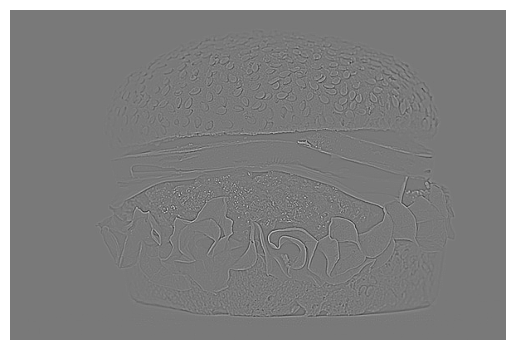

In [45]:
sharpen_filter = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

filter_image(img_array, sharpen_filter, 1)

# 8) Який-небудь фiльтр який я вигадав сам

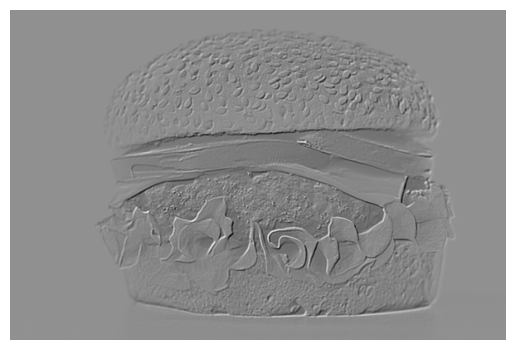

In [46]:
sharpen_filter = np.array([
    [-2, -1,  0],
    [-1,  1,  1],
    [ 0,  1,  2]
])

filter_image(img_array, sharpen_filter, 1)